### Student Information
Name: 劉晉睿

Student ID: 11128129

GitHub ID: 33049242

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---
#### Data Preprocessing

In [3]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh

# 讀取 CSV 檔案
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# 選擇 sentiment 和 comment 欄位
sentiments = df['sentiment'].tolist()
comments = df['comment'].tolist()

# 使用 format_rows 函數格式化 "comment" 欄位
formatted_comments = dmh.format_rows(comments)

# 將處理後的 comments 放回 DataFrame
df['comment'] = formatted_comments

# 篩選出 "sentiment" 和 "comment" 這兩個欄位，形成新的 DataFrame
df_filtered = df[['sentiment', 'comment']]

# 將 DataFrame 轉換為列表
df_list = df_filtered.values.tolist()

# 使用 pd.DataFrame.from_records 重新建立 DataFrame
df_reconstructed = pd.DataFrame.from_records(df_list, columns=['sentiment', 'comment'])

# 查看結果

# print(df_reconstructed)
df_reconstructed[0:5]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [5]:
# check missing values
df_reconstructed.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [7]:
df_reconstructed.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


---
#### Visualization
***Sentiment Distribution Bar Chart:***

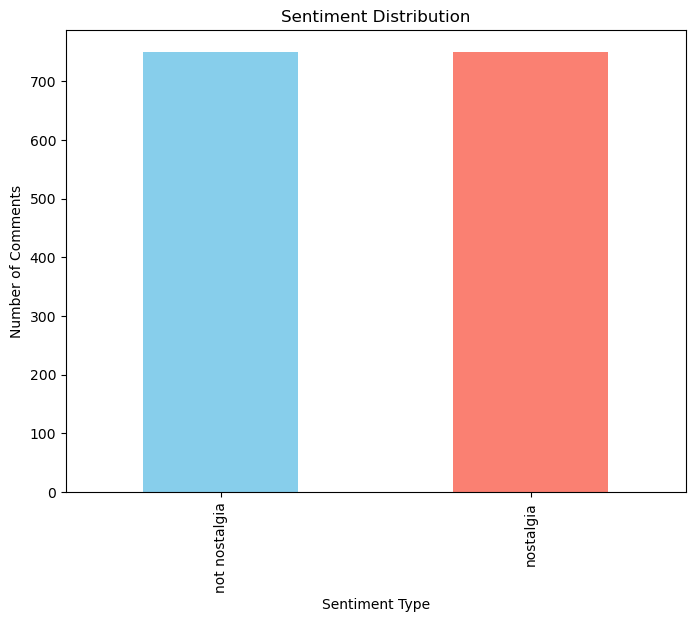

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Count occurrences of each sentiment type
sentiment_counts = df['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Comments')
plt.show()


***Word Cloud for Nostalgic and Non-Nostalgic Comments:***

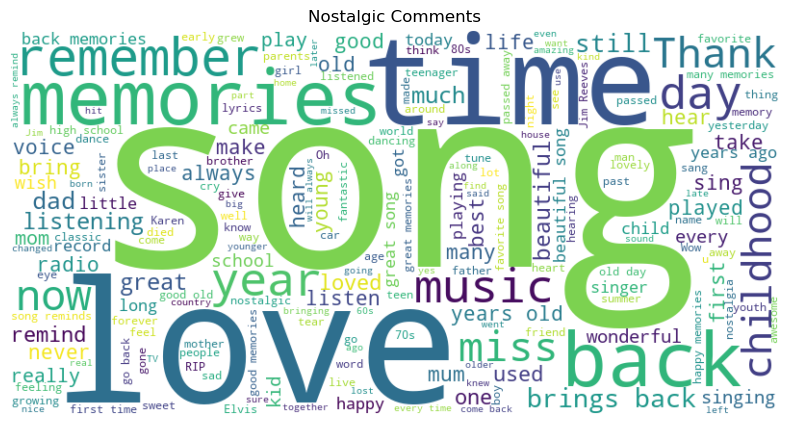

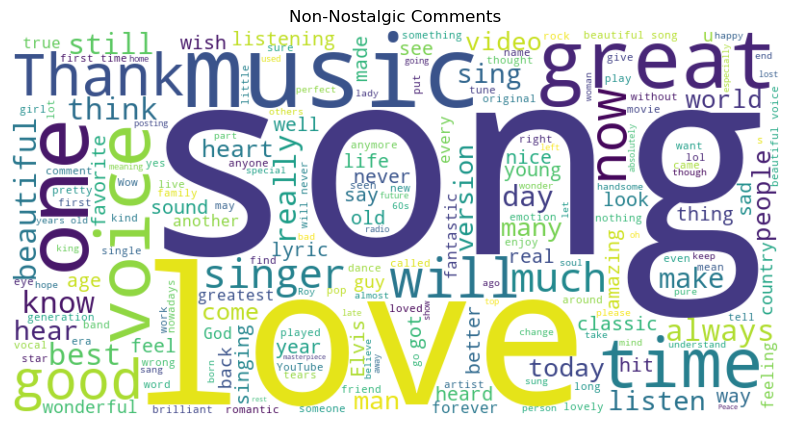

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate nostalgic and non-nostalgic comments
nostalgic_comments = ' '.join(df[df['sentiment'] == 'nostalgia']['comment'].dropna())
non_nostalgic_comments = ' '.join(df[df['sentiment'] == 'not nostalgia']['comment'].dropna())

# Check if comments exist before generating the word cloud
if nostalgic_comments.strip():
    nostalgic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgic_comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(nostalgic_wordcloud, interpolation='bilinear')
    plt.title('Nostalgic Comments')
    plt.axis('off')
    plt.show()
else:
    print("No available nostalgic comments to generate a word cloud.")

if non_nostalgic_comments.strip():
    non_nostalgic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_nostalgic_comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(non_nostalgic_wordcloud, interpolation='bilinear')
    plt.title('Non-Nostalgic Comments')
    plt.axis('off')
    plt.show()
else:
    print("No available non-nostalgic comments to generate a word cloud.")

---
#### TF-IDF features

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Get the comments column
comments = df['comment'].dropna()

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the comments to generate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(comments)

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame (first 5 rows for brevity)
print(tfidf_df.head())

    00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3730 columns]


---
#### Naive Bayes classifier

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Drop missing comments and filter the sentiment and comment columns
df = df[['sentiment', 'comment']].dropna()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['sentiment'], test_size=0.3, random_state=42)

### 1. Naive Bayes Classifier using TF-IDF Features ###
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Multinomial Naive Bayes on TF-IDF features
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate on test data
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)
print("Multinomial NB (TF-IDF) Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Multinomial NB (TF-IDF) Classification Report:\n", classification_report(y_test, y_pred_tfidf))
print("==============================================\n")

### 2. Naive Bayes Classifier using Word Frequency Features ###
# Initialize CountVectorizer for word frequencies
count_vectorizer = CountVectorizer(binary=True)  # Binary features (word presence/absence)

# Fit and transform the text data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train Bernoulli Naive Bayes on word frequency features
bnb_count = BernoulliNB()
bnb_count.fit(X_train_count, y_train)

# Predict and evaluate on test data
y_pred_count = bnb_count.predict(X_test_count)
print("Bernoulli NB (Word Frequency) Accuracy:", accuracy_score(y_test, y_pred_count))
print("Bernoulli NB (Word Frequency) Classification Report:\n", classification_report(y_test, y_pred_count))


Multinomial NB (TF-IDF) Accuracy: 0.8488888888888889
Multinomial NB (TF-IDF) Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.80      0.93      0.86       225
not nostalgia       0.92      0.76      0.83       225

     accuracy                           0.85       450
    macro avg       0.86      0.85      0.85       450
 weighted avg       0.86      0.85      0.85       450


Bernoulli NB (Word Frequency) Accuracy: 0.8733333333333333
Bernoulli NB (Word Frequency) Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.84      0.92      0.88       225
not nostalgia       0.91      0.83      0.87       225

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450

